# Project: Robot Force Prediction

## Objective
Build a model to predict force experienced by Robots in the System

## Context
A Robotic Manufacturing System is used to form metal sheets into desired geometries. The manufacturing cell uses two opposing robots R1 and R2, applying pressure onto a metal sheet to deform it. The robots move along a path that allows the system to give shape to the metal sheet.

R1, the "Forming Robot" pushes into the sheet, in direction Z, while moving along a certain path in the X/Y plane, parallel to the sheet metal surface. The opposing "Support Robot" R2 pushes into the sheet from the other side, providing the "pinch". It too moves along a similar path but obviously not exactly the same as R1, in the X/Y plane.

Both robots experience forces at the tool-tip in X, Y and Z directions, and these forces are captured by sensors embedded into the robots. The force data is recorded along with position data from Robot encoders, as well as orientation data in form of Euler angles (Pitch, Yaw, Roll) A, B, C for each robot.


## Problem Statement
Develop a model that would  predict forces experienced by the tool-tips, for any path travelled by the robots.


# import packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy
import statsmodels.api as sm

# Read data

In [3]:
data_1 = pd.read_csv('Test1.csv')
data_2 = pd.read_csv('Test2.csv')
data_4 = pd.read_csv('Test4.csv')

# Dataset Properties

In [5]:
# data size and shape
print(f"data_1.shape: {data_1.shape}")
print(f"data_2.shape: {data_2.shape}")
print(f"data_4.shape: {data_4.shape}")

data_1.shape: (20091, 19)
data_2.shape: (20161, 19)
data_4.shape: (28987, 19)


# Probe Sample data

In [9]:
# Display data
data_1.head()

,t,a_enc_1,b_enc_1,c_enc_1,z_enc_1,y_enc_1,x_enc_1,a_enc_2,b_enc_2,c_enc_2,y_enc_2,z_enc_2,x_enc_2,fx_1,fy_1,fz_1,fx_2,fy_2,fz_2
0,1637004936,-4.951100,0.0183,-0.0719,895.3528,324.101500,213.633700,-154.9772,0.2024,-179.8797,783.177100,-772.5771,22.319700,-4.168657,9.190370,3.382994,10.721234,19.250904,-16.732561
1,1637004937,-4.951100,0.0183,-0.0719,895.3528,324.101497,213.633700,-154.9772,0.2024,-179.8798,783.175400,-772.5771,22.320400,-4.242222,9.114000,2.850048,10.496114,18.593503,-15.032445
2,1637004938,-4.951100,0.0183,-0.0719,895.3528,324.101495,213.633699,-154.9772,0.2023,-179.8798,783.176098,-772.5771,22.322096,-4.392767,9.070117,3.059069,10.518067,18.748556,-16.711510
3,1637004939,-4.951199,0.0183,-0.0719,895.3528,324.099016,213.633303,-154.9772,0.2024,-179.8798,783.175400,-772.5771,22.320400,-4.088275,8.868698,3.615986,10.683620,18.412971,-16.228383
4,1637004940,-4.951200,0.0183,-0.0719,895.3528,324.099011,213.633302,-154.9772,0.2024,-179.8798,783.175400,-772.5771,22.320400,-4.399656,8.778390,3.318959,10.369269,18.326622,-16.881959


In [10]:
data_2.head()

,t,a_enc_1,b_enc_1,c_enc_1,z_enc_1,y_enc_1,x_enc_1,a_enc_2,b_enc_2,c_enc_2,y_enc_2,z_enc_2,x_enc_2,fx_1,fy_1,fz_1,fx_2,fy_2,fz_2
0,1637004936,-4.951100,0.0183,-0.0719,895.3528,324.101500,213.633700,-154.9772,0.2024,-179.8797,783.177100,-772.5771,22.319700,-4.168657,9.190370,3.382994,10.721234,19.250904,-16.732561
1,1637004937,-4.951100,0.0183,-0.0719,895.3528,324.101497,213.633700,-154.9772,0.2024,-179.8798,783.175400,-772.5771,22.320400,-4.242222,9.114000,2.850048,10.496114,18.593503,-15.032445
2,1637004938,-4.951100,0.0183,-0.0719,895.3528,324.101495,213.633699,-154.9772,0.2023,-179.8798,783.176098,-772.5771,22.322096,-4.392767,9.070117,3.059069,10.518067,18.748556,-16.711510
3,1637004939,-4.951199,0.0183,-0.0719,895.3528,324.099016,213.633303,-154.9772,0.2024,-179.8798,783.175400,-772.5771,22.320400,-4.088275,8.868698,3.615986,10.683620,18.412971,-16.228383
4,1637004940,-4.951200,0.0183,-0.0719,895.3528,324.099011,213.633302,-154.9772,0.2024,-179.8798,783.175400,-772.5771,22.320400,-4.399656,8.778390,3.318959,10.369269,18.326622,-16.881959


In [11]:
data_4.head()

,t,a_enc_1,b_enc_1,c_enc_1,z_enc_1,y_enc_1,x_enc_1,a_enc_2,b_enc_2,c_enc_2,y_enc_2,z_enc_2,x_enc_2,fx_1,fy_1,fz_1,fx_2,fy_2,fz_2
0,1637362767,-4.9512,0.0183,-0.0719,895.3528,324.099000,213.633300,-154.9772,0.2024,-179.8798,783.175400,-772.5771,22.320400,-3.032278,10.828661,-50.630136,9.523903,18.360941,-4.349339
1,1637362768,-4.9511,0.0183,-0.0719,895.3528,324.101500,213.633700,-154.9772,0.2024,-179.8798,783.175400,-772.5771,22.320400,-2.943760,10.469587,-50.269871,9.388515,18.410955,-3.943046
2,1637362769,-4.9512,0.0183,-0.0719,895.3528,324.099008,213.633301,-154.9772,0.2024,-179.8798,783.175400,-772.5771,22.320400,-2.877008,10.641118,-51.787233,9.207934,17.434249,-1.858033
3,1637362770,-4.9510,0.0183,-0.0719,895.3528,324.103994,213.634199,-154.9772,0.2024,-179.8798,783.175400,-772.5771,22.320396,-3.104533,10.679307,-50.673054,9.114192,18.594151,-2.520182
4,1637362771,-4.9511,0.0183,-0.0719,895.3528,324.101492,213.633699,-154.9773,0.2024,-179.8798,783.174405,-772.5771,22.318711,-3.147975,10.443695,-50.880316,8.791884,18.243160,-4.777954


# Dataset properties: Feature and Output Columns

In [7]:
# columns
columns_1 = data_1.columns
print(f"data_1 columns: {columns_1}")

columns_2 = data_2.columns
print(f"data_2 columns: {columns_2}")

columns_4 = data_4.columns
print(f"data_4 columns: {columns_4}")

data_1 columns: Index(['t', 'a_enc_1', 'b_enc_1', 'c_enc_1', 'x_enc_1', 'y_enc_1', 'z_enc_1',
       'a_enc_2', 'b_enc_2', 'c_enc_2', 'x_enc_2', 'y_enc_2', 'z_enc_2',
       'fx_1', 'fy_1', 'fz_1', 'fx_2', 'fy_2', 'fz_2'],
      dtype='object')
data_2 columns: Index(['t', 'a_enc_1', 'b_enc_1', 'c_enc_1', 'z_enc_1', 'y_enc_1', 'x_enc_1',
       'a_enc_2', 'b_enc_2', 'c_enc_2', 'y_enc_2', 'z_enc_2', 'x_enc_2',
       'fx_1', 'fy_1', 'fz_1', 'fx_2', 'fy_2', 'fz_2'],
      dtype='object')
data_4 columns: Index(['t', 'a_enc_1', 'b_enc_1', 'c_enc_1', 'z_enc_1', 'y_enc_1', 'x_enc_1',
       'a_enc_2', 'b_enc_2', 'c_enc_2', 'y_enc_2', 'z_enc_2', 'x_enc_2',
       'fx_1', 'fy_1', 'fz_1', 'fx_2', 'fy_2', 'fz_2'],
      dtype='object')


In [20]:
feature_columns = ['a_enc_1', 'b_enc_1', 'c_enc_1', 'x_enc_1', 'y_enc_1', \
                   'z_enc_1', 'a_enc_2', 'b_enc_2', 'c_enc_2', 'x_enc_2', 'y_enc_2', 'z_enc_2']
output_columns = ['fx_1', 'fy_1', 'fz_1', 'fx_2', 'fy_2', 'fz_2']

## Findings
All three dataset has same feature columns and output columns

**Features** 'a_enc_1', 'b_enc_1', 'c_enc_1', 'x_enc_1', 'y_enc_1', 'z_enc_1', 'a_enc_2', 'b_enc_2', 'c_enc_2', 'x_enc_2', 'y_enc_2', 'z_enc_2'

**Outputs** 'fx_1', 'fy_1', 'fz_1', 'fx_2', 'fy_2', 'fz_2'

# Reorder data_2 and data_4 columns to be same as data_1 for easier comparisons (correlation plot/stats)

In [16]:
data_2 = data_2[columns_1]
data_4 = data_4[columns_1]

# Dataset Properties: Stats

In [17]:
data_1.describe()

,t,a_enc_1,b_enc_1,c_enc_1,x_enc_1,y_enc_1,z_enc_1,a_enc_2,b_enc_2,c_enc_2,x_enc_2,y_enc_2,z_enc_2,fx_1,fy_1,fz_1,fx_2,fy_2,fz_2
count,2.009100e+04,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000
mean,1.636590e+09,-89.243342,0.000876,0.001884,457.838727,196.582466,-65.004211,88.043654,0.001449,-48.584657,456.038225,199.566334,-76.051201,30.842497,90.713730,2518.588040,-29.178737,-103.178406,-740.617396
std,5.800524e+03,7.811876,0.002961,0.007390,197.669145,103.805836,100.980291,22.349876,0.029150,173.319815,202.637762,120.025141,81.255998,681.262919,1192.944410,582.206105,441.132354,729.100519,302.882751
min,1.636580e+09,-90.010338,-0.016044,-0.071996,89.375309,-1.773652,-176.784882,-178.388554,-2.199676,-180.000000,22.318914,-3.800164,-772.577100,-1919.499515,-1841.587267,-77.996067,-1488.688155,-1584.796551,-2315.788958
25%,1.636585e+09,-89.999386,-0.000656,0.000616,290.419367,100.769458,-109.418459,89.995441,-0.001200,-179.998927,288.144090,94.387694,-106.965317,-230.351587,-1176.059427,2447.281778,-256.660575,-773.561600,-811.944934
50%,1.636590e+09,-89.997882,0.000694,0.002700,456.793417,205.300159,-69.102747,89.997237,-0.000319,-179.997522,456.648642,205.461697,-65.262847,16.014140,93.456255,2654.714428,-34.196624,-173.398829,-662.764566
75%,1.636595e+09,-89.996412,0.002148,0.004283,623.566147,290.913058,-33.555666,89.998776,0.000556,179.998508,624.802175,294.557702,-28.547567,366.363106,1299.823169,2854.014779,159.026327,692.334489,-559.024622
max,1.636600e+09,-4.951004,0.023382,0.021594,830.689381,367.268497,895.352800,178.951853,1.164570,180.000000,831.872986,783.177337,-0.681790,1876.367359,2238.735152,3374.798895,1233.724258,1303.750689,-5.323892


In [18]:
data_2.describe()

,t,a_enc_1,b_enc_1,c_enc_1,x_enc_1,y_enc_1,z_enc_1,a_enc_2,b_enc_2,c_enc_2,x_enc_2,y_enc_2,z_enc_2,fx_1,fy_1,fz_1,fx_2,fy_2,fz_2
count,2.016100e+04,20161.000000,20161.000000,20161.000000,20161.000000,20161.000000,20161.000000,20161.000000,20161.000000,20161.000000,20161.000000,20161.000000,20161.000000,20161.000000,20161.000000,20161.000000,20161.000000,20161.000000,20161.000000
mean,1.637015e+09,-89.840008,-0.000699,0.000721,460.665385,711.603851,-72.277629,89.747042,0.000593,-130.911287,460.362467,711.476284,-70.688186,41.760347,73.298569,2559.621166,-26.553260,-54.334268,-685.907699
std,5.820499e+03,3.332174,0.002414,0.005070,194.515037,105.521246,60.479199,9.187862,0.010802,123.538965,197.126196,108.975801,54.391704,672.682076,1168.250160,501.215279,402.136550,685.831686,274.119744
min,1.637005e+09,-90.010318,-0.015108,-0.071900,89.898378,324.099011,-176.890402,-177.937920,-0.369962,-180.000000,22.319700,513.252452,-772.577152,-1899.246669,-1763.564700,-37.069060,-1449.050761,-1536.288053,-2044.472668
25%,1.637010e+09,-90.000839,-0.001486,-0.000121,301.814720,612.954310,-109.446811,89.994217,-0.000800,-179.998514,300.041002,608.018472,-104.891509,-196.387494,-1192.311209,2502.060198,-233.739589,-687.830137,-754.341514
50%,1.637015e+09,-89.999789,-0.000711,0.000887,461.058382,720.530738,-70.620047,89.995203,0.000209,-179.997800,460.838464,721.179102,-65.174853,44.751381,133.872233,2675.870964,-46.200691,-207.880029,-620.034249
75%,1.637020e+09,-89.998807,0.000056,0.001900,619.004926,806.754679,-35.636347,89.996200,0.001200,-179.996037,620.169064,810.592095,-29.253553,385.348601,1270.926963,2846.983989,138.565205,705.416473,-514.173677
max,1.637025e+09,-4.951001,0.024100,0.027756,829.366949,884.270588,895.352800,179.282356,0.530392,180.000000,830.709862,885.958430,-0.476249,1831.276479,2079.791427,3346.377010,1143.240431,1359.332893,-8.365134


In [14]:
data_4.describe()

,t,a_enc_1,b_enc_1,c_enc_1,z_enc_1,y_enc_1,x_enc_1,a_enc_2,b_enc_2,c_enc_2,y_enc_2,z_enc_2,x_enc_2,fx_1,fy_1,fz_1,fx_2,fy_2,fz_2
count,2.898700e+04,28987.000000,28987.000000,28987.000000,28987.000000,28987.000000,28987.000000,28987.000000,28987.000000,28987.000000,28987.000000,28987.000000,28987.000000,28987.000000,28987.000000,28987.000000,28987.000000,28987.000000,28987.000000
mean,1.637377e+09,-89.480526,-0.000712,0.000390,-83.464438,1104.229093,459.310574,88.634465,0.001090,-128.220887,1106.168587,-88.693031,458.345074,63.532739,178.475022,2415.879416,-35.277089,-61.451198,-628.716800
std,8.368219e+03,6.496682,0.002457,0.006459,94.392872,140.454673,232.638715,18.615997,0.018071,126.327457,133.493524,77.549157,236.393374,736.038983,1064.110562,531.193444,405.258023,658.310617,212.617184
min,1.637363e+09,-90.012872,-0.018559,-0.071900,-216.702079,324.099000,20.101412,-179.334265,-1.337127,-180.000000,783.171690,-772.580026,18.570494,-2022.676432,-1944.292631,-82.481350,-1585.198180,-1445.792510,-2305.813952
25%,1.637370e+09,-89.999979,-0.001564,-0.000218,-132.744547,993.833906,263.145903,89.994297,-0.001009,-179.998546,988.772990,-129.534920,261.756266,-188.674470,-796.656447,2322.899989,-219.718770,-681.734023,-770.930107
50%,1.637377e+09,-89.998892,-0.000795,0.000860,-83.946756,1107.830538,457.900875,89.995300,-0.000149,-179.997695,1108.240463,-79.687021,457.827811,55.832586,177.167422,2560.220980,-32.679150,-239.368792,-581.030656
75%,1.637385e+09,-89.997790,-0.000038,0.001945,-41.258719,1226.647514,654.481289,89.996271,0.000728,-179.995953,1228.955424,-35.457538,655.456116,418.211031,1212.101004,2749.530268,159.183308,612.734869,-484.119504
max,1.637392e+09,-4.950901,0.018300,0.026124,895.352800,1315.394509,901.604391,177.679265,0.348175,180.000000,1317.020430,-0.206868,903.055003,1921.166766,1890.530850,3342.554789,1130.962869,1276.602218,10.776189


## Findings

* The variables in the three datasets have similar distribution

# Dataset Properties: Variable Correlation

In [15]:
corr_1 = data_1.corr()
corr_2 = data_2.corr()
corr_4 = data_4.corr()

In [50]:
corr_1.style.background_gradient(cmap='coolwarm').set_precision(2)

,t,a_enc_1,b_enc_1,c_enc_1,x_enc_1,y_enc_1,z_enc_1,a_enc_2,b_enc_2,c_enc_2,x_enc_2,y_enc_2,z_enc_2,fx_1,fy_1,fz_1,fx_2,fy_2,fz_2
t,1.00,-0.17,0.12,0.22,0.02,-0.07,-0.59,0.15,-0.11,0.33,0.03,-0.12,-0.42,0.02,-0.02,0.37,-0.02,0.02,-0.26
a_enc_1,-0.17,1.00,0.51,-0.93,-0.11,0.11,0.89,-0.95,0.65,-0.07,-0.20,0.44,-0.80,-0.00,-0.01,-0.42,0.01,0.02,0.23
b_enc_1,0.12,0.51,1.00,-0.39,-0.08,0.06,0.37,-0.53,0.30,0.05,-0.12,0.23,-0.50,-0.03,0.07,-0.02,-0.04,0.01,0.12
c_enc_1,0.22,-0.93,-0.39,1.00,0.12,-0.09,-0.85,0.88,-0.61,0.16,0.20,-0.41,0.72,0.03,0.03,0.47,0.01,-0.02,-0.15
x_enc_1,0.02,-0.11,-0.08,0.12,1.00,-0.01,-0.10,0.11,-0.07,0.02,1.00,-0.05,0.09,-0.75,0.02,0.14,0.82,-0.02,-0.14
y_enc_1,-0.07,0.11,0.06,-0.09,-0.01,1.00,0.12,-0.11,0.07,-0.03,-0.02,0.94,-0.05,0.01,-0.85,-0.05,0.03,0.91,0.10
z_enc_1,-0.59,0.89,0.37,-0.85,-0.10,0.12,1.00,-0.84,0.58,-0.20,-0.18,0.41,-0.46,-0.01,0.01,-0.51,0.02,0.00,0.33
a_enc_2,0.15,-0.95,-0.53,0.88,0.11,-0.11,-0.84,1.00,-0.61,0.07,0.19,-0.43,0.76,0.00,0.01,0.38,-0.01,-0.01,-0.21
b_enc_2,-0.11,0.65,0.30,-0.61,-0.07,0.07,0.58,-0.61,1.00,-0.07,-0.13,0.29,-0.52,-0.01,-0.02,-0.28,0.01,0.02,0.15
c_enc_2,0.33,-0.07,0.05,0.16,0.02,-0.03,-0.20,0.07,-0.07,1.00,0.03,-0.05,-0.12,0.12,0.03,0.16,0.07,-0.02,-0.04


# Feature-Feature Correlation

In [22]:
feature_feature_corr_1 = data_1[feature_columns].corr()
feature_feature_corr_2 = data_2[feature_columns].corr()
feature_feature_corr_4 = data_4[feature_columns].corr()

In [31]:
feature_feature_corr_1['a_enc_1']['b_enc_1']

0.5083753105068993

In [23]:
feature_feature_corr_1.style.background_gradient(cmap='coolwarm').set_precision(2)

,a_enc_1,b_enc_1,c_enc_1,x_enc_1,y_enc_1,z_enc_1,a_enc_2,b_enc_2,c_enc_2,x_enc_2,y_enc_2,z_enc_2
a_enc_1,1.00,0.51,-0.93,-0.11,0.11,0.89,-0.95,0.65,-0.07,-0.20,0.44,-0.80
b_enc_1,0.51,1.00,-0.39,-0.08,0.06,0.37,-0.53,0.30,0.05,-0.12,0.23,-0.50
c_enc_1,-0.93,-0.39,1.00,0.12,-0.09,-0.85,0.88,-0.61,0.16,0.20,-0.41,0.72
x_enc_1,-0.11,-0.08,0.12,1.00,-0.01,-0.10,0.11,-0.07,0.02,1.00,-0.05,0.09
y_enc_1,0.11,0.06,-0.09,-0.01,1.00,0.12,-0.11,0.07,-0.03,-0.02,0.94,-0.05
z_enc_1,0.89,0.37,-0.85,-0.10,0.12,1.00,-0.84,0.58,-0.20,-0.18,0.41,-0.46
a_enc_2,-0.95,-0.53,0.88,0.11,-0.11,-0.84,1.00,-0.61,0.07,0.19,-0.43,0.76
b_enc_2,0.65,0.30,-0.61,-0.07,0.07,0.58,-0.61,1.00,-0.07,-0.13,0.29,-0.52
c_enc_2,-0.07,0.05,0.16,0.02,-0.03,-0.20,0.07,-0.07,1.00,0.03,-0.05,-0.12
x_enc_2,-0.20,-0.12,0.20,1.00,-0.02,-0.18,0.19,-0.13,0.03,1.00,-0.09,0.16


In [24]:
feature_feature_corr_2.style.background_gradient(cmap='coolwarm').set_precision(2)

,a_enc_1,b_enc_1,c_enc_1,x_enc_1,y_enc_1,z_enc_1,a_enc_2,b_enc_2,c_enc_2,x_enc_2,y_enc_2,z_enc_2
a_enc_1,1.00,0.21,-0.58,-0.05,-0.13,0.65,-0.75,0.79,-0.00,-0.08,0.04,-0.53
b_enc_1,0.21,1.00,-0.17,-0.01,-0.04,0.12,-0.25,0.07,0.02,-0.02,-0.01,-0.11
c_enc_1,-0.58,-0.17,1.00,0.06,0.07,-0.38,0.42,-0.44,0.27,0.08,-0.03,0.30
x_enc_1,-0.05,-0.01,0.06,1.00,0.01,-0.03,0.04,-0.04,0.03,1.00,-0.00,0.02
y_enc_1,-0.13,-0.04,0.07,0.01,1.00,-0.02,0.11,-0.10,-0.16,0.01,0.99,0.12
z_enc_1,0.65,0.12,-0.38,-0.03,-0.02,1.00,-0.46,0.52,-0.04,-0.05,0.09,0.28
a_enc_2,-0.75,-0.25,0.42,0.04,0.11,-0.46,1.00,-0.55,0.02,0.07,-0.02,0.37
b_enc_2,0.79,0.07,-0.44,-0.04,-0.10,0.52,-0.55,1.00,0.02,-0.07,0.03,-0.42
c_enc_2,-0.00,0.02,0.27,0.03,-0.16,-0.04,0.02,0.02,1.00,0.03,-0.16,-0.05
x_enc_2,-0.08,-0.02,0.08,1.00,0.01,-0.05,0.07,-0.07,0.03,1.00,-0.00,0.04


In [25]:
feature_feature_corr_4.style.background_gradient(cmap='coolwarm').set_precision(2)

,a_enc_1,b_enc_1,c_enc_1,x_enc_1,y_enc_1,z_enc_1,a_enc_2,b_enc_2,c_enc_2,x_enc_2,y_enc_2,z_enc_2
a_enc_1,1.00,0.56,-0.86,-0.08,-0.42,0.80,-0.96,0.87,-0.03,-0.14,-0.18,-0.68
b_enc_1,0.56,1.00,-0.58,-0.04,-0.25,0.44,-0.58,0.44,-0.03,-0.08,-0.12,-0.38
c_enc_1,-0.86,-0.58,1.00,0.09,0.37,-0.69,0.83,-0.75,0.18,0.14,0.16,0.59
x_enc_1,-0.08,-0.04,0.09,1.00,0.03,-0.07,0.08,-0.07,0.02,1.00,0.01,0.05
y_enc_1,-0.42,-0.25,0.37,0.03,1.00,-0.24,0.41,-0.37,-0.00,0.06,0.97,0.39
z_enc_1,0.80,0.44,-0.69,-0.07,-0.24,1.00,-0.76,0.70,-0.06,-0.12,-0.04,-0.12
a_enc_2,-0.96,-0.58,0.83,0.08,0.41,-0.76,1.00,-0.82,0.03,0.14,0.18,0.65
b_enc_2,0.87,0.44,-0.75,-0.07,-0.37,0.70,-0.82,1.00,-0.01,-0.12,-0.16,-0.59
c_enc_2,-0.03,-0.03,0.18,0.02,-0.00,-0.06,0.03,-0.01,1.00,0.03,-0.01,-0.04
x_enc_2,-0.14,-0.08,0.14,1.00,0.06,-0.12,0.14,-0.12,0.03,1.00,0.02,0.09


# Average the three feature_feature correlation values to indentify global relationships

In [35]:
feature_feature_corr = sum([feature_feature_corr_1/3, feature_feature_corr_2/3, feature_feature_corr_4/3]) 
feature_feature_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,a_enc_1,b_enc_1,c_enc_1,x_enc_1,y_enc_1,z_enc_1,a_enc_2,b_enc_2,c_enc_2,x_enc_2,y_enc_2,z_enc_2
a_enc_1,1.00,0.43,-0.79,-0.08,-0.15,0.78,-0.89,0.77,-0.03,-0.14,0.10,-0.67
b_enc_1,0.43,1.00,-0.38,-0.05,-0.08,0.31,-0.45,0.27,0.01,-0.07,0.03,-0.33
c_enc_1,-0.79,-0.38,1.00,0.09,0.11,-0.64,0.71,-0.60,0.20,0.14,-0.09,0.54
x_enc_1,-0.08,-0.05,0.09,1.00,0.01,-0.06,0.08,-0.06,0.03,1.00,-0.01,0.06
y_enc_1,-0.15,-0.08,0.11,0.01,1.00,-0.05,0.14,-0.13,-0.06,0.02,0.96,0.16
z_enc_1,0.78,0.31,-0.64,-0.06,-0.05,1.00,-0.69,0.60,-0.10,-0.11,0.15,-0.10
a_enc_2,-0.89,-0.45,0.71,0.08,0.14,-0.69,1.00,-0.66,0.04,0.13,-0.09,0.59
b_enc_2,0.77,0.27,-0.60,-0.06,-0.13,0.60,-0.66,1.00,-0.02,-0.11,0.06,-0.51
c_enc_2,-0.03,0.01,0.20,0.03,-0.06,-0.10,0.04,-0.02,1.00,0.03,-0.07,-0.07
x_enc_2,-0.14,-0.07,0.14,1.00,0.02,-0.11,0.13,-0.11,0.03,1.00,-0.02,0.10


# Findings:

* x_enc_1 and x_enc_2 always perfectly correlated (corr=1), which is intuitively understandable.
* however, y_enc_1 and y_enc_2 is not perfectly correlated (0.94, 0.99, 0.97). 
* We can remove either x_enc_1 or x_enc_2.

In [ ]:
# output-output Correlation

In [37]:
output_output_corr_1 = data_1[output_columns].corr()
output_output_corr_2 = data_2[output_columns].corr()
output_output_corr_4 = data_4[output_columns].corr()

In [39]:
output_output_corr_1.style.background_gradient(cmap='coolwarm').set_precision(2)

,fx_1,fy_1,fz_1,fx_2,fy_2,fz_2
fx_1,1.00,-0.03,-0.13,-0.84,0.03,0.14
fy_1,-0.03,1.00,0.09,-0.00,-0.96,-0.04
fz_1,-0.13,0.09,1.00,0.11,-0.07,0.07
fx_2,-0.84,-0.00,0.11,1.00,0.01,-0.13
fy_2,0.03,-0.96,-0.07,0.01,1.00,0.12
fz_2,0.14,-0.04,0.07,-0.13,0.12,1.00


In [40]:
output_output_corr_2.style.background_gradient(cmap='coolwarm').set_precision(2)

,fx_1,fy_1,fz_1,fx_2,fy_2,fz_2
fx_1,1.00,-0.07,-0.15,-0.85,0.07,0.13
fy_1,-0.07,1.00,0.15,0.04,-0.96,0.08
fz_1,-0.15,0.15,1.00,0.13,-0.11,0.26
fx_2,-0.85,0.04,0.13,1.00,-0.05,-0.16
fy_2,0.07,-0.96,-0.11,-0.05,1.00,0.01
fz_2,0.13,0.08,0.26,-0.16,0.01,1.00


In [41]:
output_output_corr_4.style.background_gradient(cmap='coolwarm').set_precision(2)

,fx_1,fy_1,fz_1,fx_2,fy_2,fz_2
fx_1,1.00,-0.07,-0.11,-0.87,0.05,0.04
fy_1,-0.07,1.00,0.24,0.04,-0.95,0.32
fz_1,-0.11,0.24,1.00,0.05,-0.18,0.26
fx_2,-0.87,0.04,0.05,1.00,-0.02,-0.04
fy_2,0.05,-0.95,-0.18,-0.02,1.00,-0.29
fz_2,0.04,0.32,0.26,-0.04,-0.29,1.00


In [ ]:
# Average the three correlation dataframe

In [42]:
output_output_corr = sum([output_output_corr_1/3, output_output_corr_2/3, output_output_corr_4/3]) 
output_output_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,fx_1,fy_1,fz_1,fx_2,fy_2,fz_2
fx_1,1.00,-0.06,-0.13,-0.85,0.05,0.10
fy_1,-0.06,1.00,0.16,0.03,-0.96,0.12
fz_1,-0.13,0.16,1.00,0.10,-0.12,0.19
fx_2,-0.85,0.03,0.10,1.00,-0.02,-0.11
fy_2,0.05,-0.96,-0.12,-0.02,1.00,-0.05
fz_2,0.10,0.12,0.19,-0.11,-0.05,1.00


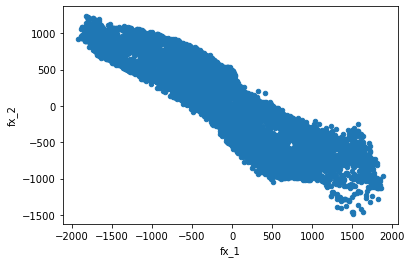

In [44]:
# scatter plot for fx_1 and fx_2
ax1 = data_1.plot.scatter(x='fx_1', y='fx_2')

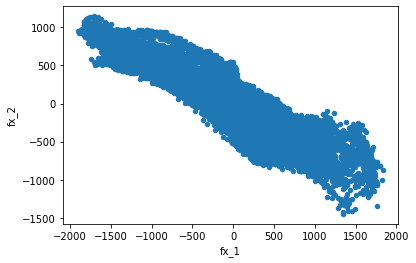

In [45]:
ax2 = data_2.plot.scatter(x='fx_1', y='fx_2')

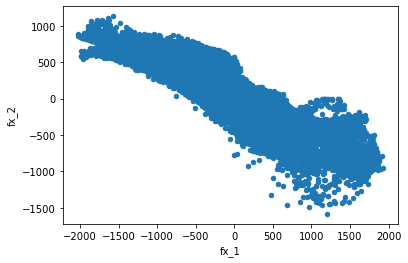

In [46]:
ax4 = data_4.plot.scatter(x='fx_1', y='fx_2')

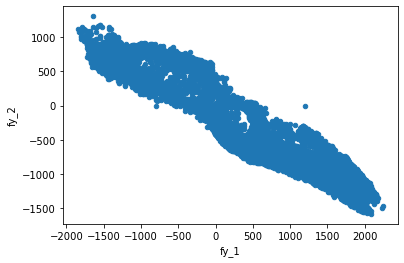

In [47]:
ay1 = data_1.plot.scatter(x='fy_1', y='fy_2')

In [48]:
# feature and output correlation

In [59]:
filtered_corr = corr_1.filter(items=feature_columns, axis=0)[output_columns]

In [60]:
filtered_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,fx_1,fy_1,fz_1,fx_2,fy_2,fz_2
a_enc_1,-0.00,-0.01,-0.42,0.01,0.02,0.23
b_enc_1,-0.03,0.07,-0.02,-0.04,0.01,0.12
c_enc_1,0.03,0.03,0.47,0.01,-0.02,-0.15
x_enc_1,-0.75,0.02,0.14,0.82,-0.02,-0.14
y_enc_1,0.01,-0.85,-0.05,0.03,0.91,0.10
z_enc_1,-0.01,0.01,-0.51,0.02,0.00,0.33
a_enc_2,0.00,0.01,0.38,-0.01,-0.01,-0.21
b_enc_2,-0.01,-0.02,-0.28,0.01,0.02,0.15
c_enc_2,0.12,0.03,0.16,0.07,-0.02,-0.04
x_enc_2,-0.74,0.02,0.17,0.81,-0.02,-0.16


In [ ]:
sns.pairplot(data_1[feature_columns[:6]])